In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('weather_forecasts.csv')
df.head()

,date,city,state,high_or_low,forecast_hours_before,observed_temp,forecast_temp,observed_precip,forecast_outlook,possible_error
0,2021-01-30,ABILENE,TX,high,48,70.0,NaN,0.0,NaN,none
1,2021-01-30,ABILENE,TX,high,36,70.0,NaN,0.0,NaN,none
2,2021-01-30,ABILENE,TX,high,24,70.0,NaN,0.0,NaN,none
3,2021-01-30,ABILENE,TX,high,12,70.0,70.0,0.0,DUST,none
4,2021-01-30,ABILENE,TX,low,48,42.0,NaN,0.0,NaN,none


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651968 entries, 0 to 651967
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   651968 non-null  object 
 1   city                   651968 non-null  object 
 2   state                  651968 non-null  object 
 3   high_or_low            651968 non-null  object 
 4   forecast_hours_before  651968 non-null  int64  
 5   observed_temp          604224 non-null  float64
 6   forecast_temp          614655 non-null  float64
 7   observed_precip        601552 non-null  float64
 8   forecast_outlook       614093 non-null  object 
 9   possible_error         651968 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 49.7+ MB


In [4]:
df.describe()

,forecast_hours_before,observed_temp,forecast_temp,observed_precip
count,651968.000000,604224.000000,614655.000000,601552.000000
mean,30.000000,57.563837,57.360754,0.098873
std,13.416418,21.810184,21.819017,0.324311
min,12.000000,-47.000000,-41.000000,0.000000
25%,21.000000,42.000000,42.000000,0.000000
50%,30.000000,59.000000,59.000000,0.000000
75%,39.000000,74.000000,74.000000,0.020000
max,48.000000,122.000000,118.000000,12.400000


In [5]:
df.columns

Index(['date', 'city', 'state', 'high_or_low', 'forecast_hours_before',
       'observed_temp', 'forecast_temp', 'observed_precip', 'forecast_outlook',
       'possible_error'],
      dtype='object')

In [6]:
#unique values from city column
df['city'].unique()

array(['ABILENE', 'AKRON_CANTON', 'ALBANY', 'ALBUQUERQUE', 'ALLENTOWN',
       'AMARILLO', 'ANCHORAGE', 'ASHEVILLE', 'ATLANTA', 'ATLANTIC_CITY',
       'AUSTIN', 'BALTIMORE', 'BATON_ROUGE', 'BILLINGS', 'BIRMINGHAM',
       'BISMARCK', 'BOISE', 'BOSTON', 'BRIDGEPORT', 'BROWNSVILLE',
       'BUFFALO', 'BURLINGTON', 'CARIBOU', 'CASPER', 'CHARLESTON',
       'CHARLOTTE', 'CHATTANOOGA', 'CHEYENNE', 'CHICAGO', 'CINCINNATI',
       'CLEVELAND', 'COLORADO_SPGS', 'COLUMBIA', 'COLUMBUS', 'LINCOLN',
       'LITTLE_ROCK', 'LOS_ANGELES', 'LOUISVILLE', 'LUBBOCK', 'MACON',
       'MADISON', 'MEDFORD', 'MEMPHIS', 'MIAMI_BEACH', 'MIDLAND_ODESSA',
       'MILWAUKEE', 'MPLS_ST_PAUL', 'MISSOULA', 'MOBILE', 'MONTGOMERY',
       'NASHVILLE', 'NEW_ORLEANS', 'NEW_YORK_CITY', 'NEWARK', 'NORFOLK',
       'NORTH_PLATTE', 'OKLAHOMA_CITY', 'OMAHA', 'ORLANDO', 'PADUCAH',
       'PENDLETON', 'PEORIA', 'PHILADELPHIA', 'PHOENIX', 'PITTSBURGH',
       'POCATELLO', 'PORTLAND', 'PROVIDENCE', 'PUEBLO', 'RALEIGH_DURHAM',
 

In [7]:
#amount of unique values from city column
df['city'].nunique()

160

In [8]:
#amount of unique values from state column
df['state'].nunique()

53

In [9]:
#unique values from state colum
df['state'].unique()

array(['TX', 'OH', 'NY', 'NM', 'PA', 'AK', 'NC', 'GA', 'NJ', 'MD', 'LA',
       'MT', 'AL', 'ND', 'ID', 'MA', 'CT', 'WY', 'VT', 'ME', 'SC', 'WV',
       'TN', 'IL', 'CO', 'NE', 'AR', 'CA', 'KY', 'WI', 'OR', 'FL', 'MN',
       'VA', 'OK', 'AZ', 'RI', 'SD', 'NV', 'MO', 'VI', 'NH', 'IA', 'MI',
       'IN', 'KS', 'HI', 'MS', 'UT', 'PR', 'WA', 'DC', 'DE'], dtype=object)

In [10]:
#unique values from high_or_low colum
df['high_or_low'].unique()

array(['high', 'low'], dtype=object)

In [11]:
#unique values from forecast_outlook colum
df['forecast_outlook'].unique()

array([nan, 'DUST', 'SUNNY', 'MOCLDY', 'SNOW', 'PTCLDY', 'RAIN', 'SHWRS',
       'CLOUDY', 'FZDRZL', 'FOG', 'WINDY', 'SNOSHW', 'RNSNOW', 'SLEET',
       'VRYCLD', 'FZRAIN', 'TSTRMS', 'BLZZRD', 'FLRRYS', 'BLGSNO', 'DRZL',
       'VRYHOT', 'SMOKE'], dtype=object)

In [12]:
#unique values from possible_error colum
df['possible_error'].unique()

array(['none', 'forecast_outlook', 'forecast_temp', 'observed_temp'],
      dtype=object)

In [13]:
df_model = df.copy()


In [14]:
#drop date column
df_model = df_model.drop('date', axis=1)

In [15]:
#amount of "none" value in possible_error column
df_model['possible_error'].value_counts()

none                651875
forecast_outlook        77
forecast_temp            8
observed_temp            8
Name: possible_error, dtype: int64

In [16]:
#drop possible_error column
df_model = df_model.drop('possible_error', axis=1)

<AxesSubplot: xlabel='observed_temp', ylabel='forecast_temp'>

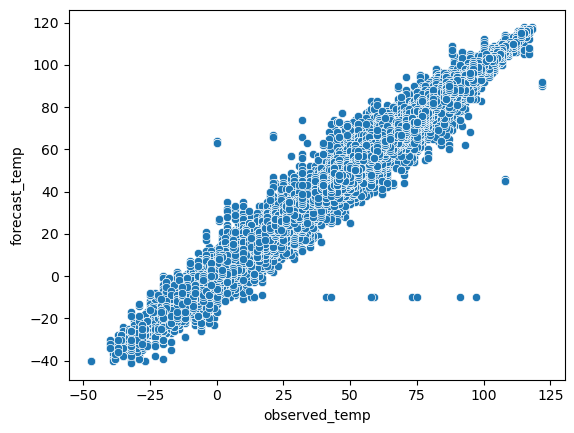

In [17]:
#check distribution of "observed_temp" vs "forecast_temp"
sns.scatterplot(x='observed_temp', y='forecast_temp', data=df_model)

In [18]:
#drop city and state columns
df_model = df_model.drop(['city', 'state'], axis=1)
df_model.head()

,high_or_low,forecast_hours_before,observed_temp,forecast_temp,observed_precip,forecast_outlook
0,high,48,70.0,NaN,0.0,NaN
1,high,36,70.0,NaN,0.0,NaN
2,high,24,70.0,NaN,0.0,NaN
3,high,12,70.0,70.0,0.0,DUST
4,low,48,42.0,NaN,0.0,NaN


In [19]:
#drop nan values
df_model = df_model.dropna()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574546 entries, 3 to 649295
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   high_or_low            574546 non-null  object 
 1   forecast_hours_before  574546 non-null  int64  
 2   observed_temp          574546 non-null  float64
 3   forecast_temp          574546 non-null  float64
 4   observed_precip        574546 non-null  float64
 5   forecast_outlook       574546 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 30.7+ MB


In [20]:
#encode categorical data
df_model = pd.get_dummies(df_model, drop_first=True)
df_model.head()

,forecast_hours_before,observed_temp,forecast_temp,observed_precip,high_or_low_low,forecast_outlook_BLZZRD,forecast_outlook_CLOUDY,forecast_outlook_DRZL,forecast_outlook_DUST,forecast_outlook_FLRRYS,...,forecast_outlook_SHWRS,forecast_outlook_SLEET,forecast_outlook_SMOKE,forecast_outlook_SNOSHW,forecast_outlook_SNOW,forecast_outlook_SUNNY,forecast_outlook_TSTRMS,forecast_outlook_VRYCLD,forecast_outlook_VRYHOT,forecast_outlook_WINDY
3,12,70.0,70.0,0.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,24,42.0,39.0,0.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,12,42.0,38.0,0.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,12,29.0,30.0,0.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,24,26.0,26.0,0.09,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#split data into train and test
from sklearn.model_selection import train_test_split

X = df_model.drop('observed_temp', axis=1)
y = df_model['observed_temp']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
}

In [24]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 9.594165695175079
Mean Absolute Error (MAE): 2.3153722820948435
R-squared Score: 0.9796811886179543

Results for Decision Tree:
Mean Squared Error (MSE): 11.4076541464752
Mean Absolute Error (MAE): 2.4666613089015983
R-squared Score: 0.975840528475508

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 9.419591114868096
Mean Absolute Error (MAE): 2.2913279551806647
R-squared Score: 0.9800509078913187

Results for ADA Boost:
Mean Squared Error (MSE): 22.87846276265062
Mean Absolute Error (MAE): 3.524246332333368
R-squared Score: 0.9515473065240854

Results for K Neighbors Regressor:
Mean Squared Error (MSE): 11.113513030563228
Mean Absolute Error (MAE): 2.5048304750411923
R-squared Score: 0.9764634693380913



In [25]:
accuracy

[0.9796811886179543,
 0.975840528475508,
 0.9800509078913187,
 0.9515473065240854,
 0.9764634693380913]